# TASK-2 To Explore Supervised Machine Learning

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Exploratory Data Analysis (EDA)

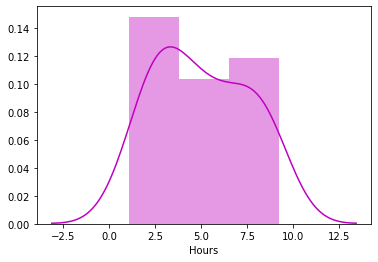

In [4]:
sns.distplot(df.Hours,color="m")

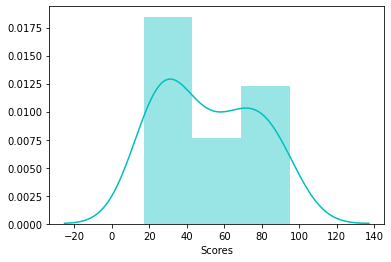

In [5]:
sns.distplot(df.Scores,color="c")

### Relationship between the Data

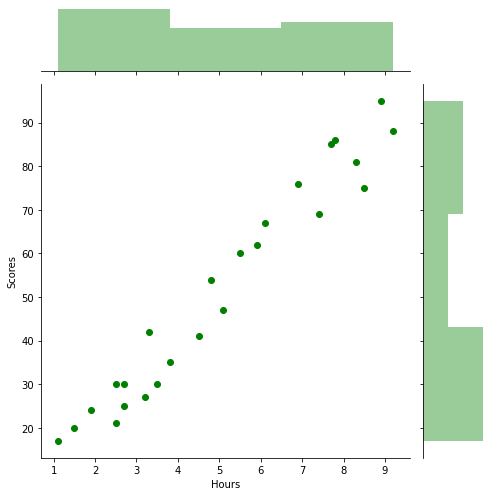

In [6]:
# Plotting the distribution of scores
sns.jointplot(x="Hours",y="Scores",data=df,kind="scatter",color="g", height=7)

##### Graph shows a positive linear relation between the number of hours studied and percentage of score.

### X-Y split

In [7]:
X=df[["Hours"]]
print(type(X))
print(X.shape)
X.head()

<class 'pandas.core.frame.DataFrame'>
(25, 1)


,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [8]:
Y=df.Scores
print(type(Y))
print(Y.shape)
Y.head()

<class 'pandas.core.series.Series'>
(25,)


0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

### Test-train split

In [9]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0) 

### Training Linear regression 

In [10]:
from sklearn.linear_model import LinearRegression  
linreg = LinearRegression()  
linreg.fit(X_train, Y_train) 

LinearRegression()

### Interpreting Model Coefficient

In [11]:
print(linreg.intercept_)
print(linreg.coef_)

2.018160041434683
[9.91065648]


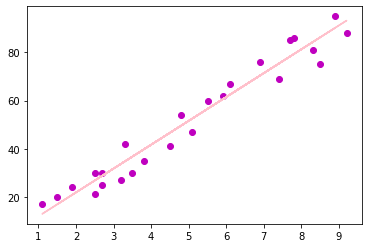

In [12]:
# Plotting the regression line
line = linreg.coef_*X+linreg.intercept_

# Plotting for the test data
plt.scatter(X, Y,color="m")
plt.plot(X, line, color="pink");
plt.show()

### Making Predictions with the Model

In [13]:
Y_pred = linreg.predict(X_test)
Y_pred[:5]

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [14]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df1 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


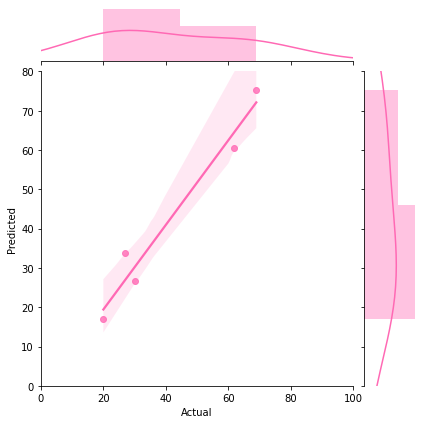

In [15]:
sns.jointplot(x="Actual",y="Predicted",xlim=(0,100),ylim=(0,80),data=df1,kind="reg",color="hotpink")

#### The Plot shows the relationship between Actual and predicted scores

### Problem Statement: 

#### What will be predicted score if a student study for 9.25 hrs in a day? 

### Answer:

In [16]:
hours = 9.25
my_pred = linreg.predict([[hours]])
print("Predicted Score of a student who studies for {} hours a day is {} ".format(hours,my_pred[0]))

Predicted Score of a student who studies for 9.25 hours a day is 93.69173248737538 


### Predict on any value

In [17]:
#input from user
hours = float(input("Enter the number of hours a student studied:"))
my_pred = linreg.predict([[hours]])
print("Predicted Score of a student who studies for {} hours a day is {} ".format(hours,my_pred[0]))

Enter the number of hours a student studied:4.5
Predicted Score of a student who studies for 4.5 hours a day is 46.616114204324745 


### Model Evaluation Metrics

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002975


In [19]:
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred)) 

Mean Squared Error: 21.5987693072174


In [20]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Root Mean Squared Error: 4.6474476121003665
